<a href="https://colab.research.google.com/github/anikashaji/Finlatics-Projetcs/blob/main/Facebook_Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns


**DATA LOADING**

In [54]:
import pandas as pd
df = pd.read_csv('/content/Facebook_Marketplace_data.csv')

In [55]:
df.head(20)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
5,6,photo,4/18/2018 2:14,217,6,0,211,5,1,0,0,0,NaN,NaN,NaN,NaN
6,7,video,4/18/2018 0:24,503,614,72,418,70,10,2,0,3,NaN,NaN,NaN,NaN
7,8,video,4/17/2018 7:42,295,453,53,260,32,1,1,0,1,NaN,NaN,NaN,NaN
8,9,photo,4/17/2018 3:33,203,1,0,198,5,0,0,0,0,NaN,NaN,NaN,NaN
9,10,photo,4/11/2018 4:53,170,9,1,167,3,0,0,0,0,NaN,NaN,NaN,NaN


**FINDING THE INFORMATION REGARDING DATAFRAME**

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

**CHECKING FOR NULLS**

In [57]:
df.isnull().sum()

,0
status_id,0
status_type,0
status_published,0
num_reactions,0
num_comments,0
num_shares,0
num_likes,0
num_loves,0
num_wows,0
num_hahas,0


**REMOVING COLUMNS WITH COMPLETE NULLS**

In [58]:
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')

In [59]:
df = df.drop(columns=['Column1', 'Column2', 'Column3',
       'Column4'])

**CHECKING DATATYPES**

In [60]:
df.dtypes

,0
status_id,int64
status_type,object
status_published,object
num_reactions,int64
num_comments,int64
num_shares,int64
num_likes,int64
num_loves,int64
num_wows,int64
num_hahas,int64


In [61]:
df['status_published'] = pd.to_datetime(df['status_published'])

In [62]:
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0
1,2,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0
2,3,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0
3,4,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0
4,5,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,2016-09-24 02:58:00,89,0,0,89,0,0,0,0,0
7046,7047,photo,2016-09-23 11:19:00,16,0,0,14,1,0,1,0,0
7047,7048,photo,2016-09-21 23:03:00,2,0,0,1,1,0,0,0,0
7048,7049,photo,2016-09-20 00:43:00,351,12,22,349,2,0,0,0,0


**CONVERSION OF CATEGORICAL COLUMN USING ONE - HOT ENCODER**

In [63]:
dfm = pd.get_dummies(df['status_type'], drop_first=True)
dfm = dfm.astype(int)
df = pd.concat([df, dfm], axis=1)
#df = df.drop(columns=['status_type'])

**CORRELATION BETWEEN FEATURES**

In [65]:
correlations = df[['num_reactions', 'num_comments', 'num_shares']].corr()
print("Correlation Matrix:")
print(correlations)

Correlation Matrix:
               num_reactions  num_comments  num_shares
num_reactions       1.000000      0.150843    0.250723
num_comments        0.150843      1.000000    0.640637
num_shares          0.250723      0.640637    1.000000


# **EXPLORATORY DATA ANALYSIS**

**CORRELATION ANALYSIS**

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation coefficients
correlation_comments = df['num_reactions'].corr(df['num_comments'])
correlation_shares = df['num_reactions'].corr(df['num_shares'])

# Display correlation coefficients
print(f"Correlation between num_reactions and num_comments: {correlation_comments}")
print(f"Correlation between num_reactions and num_shares: {correlation_shares}")


Correlation between num_reactions and num_comments: 0.15084290344217643
Correlation between num_reactions and num_shares: 0.250722516628319


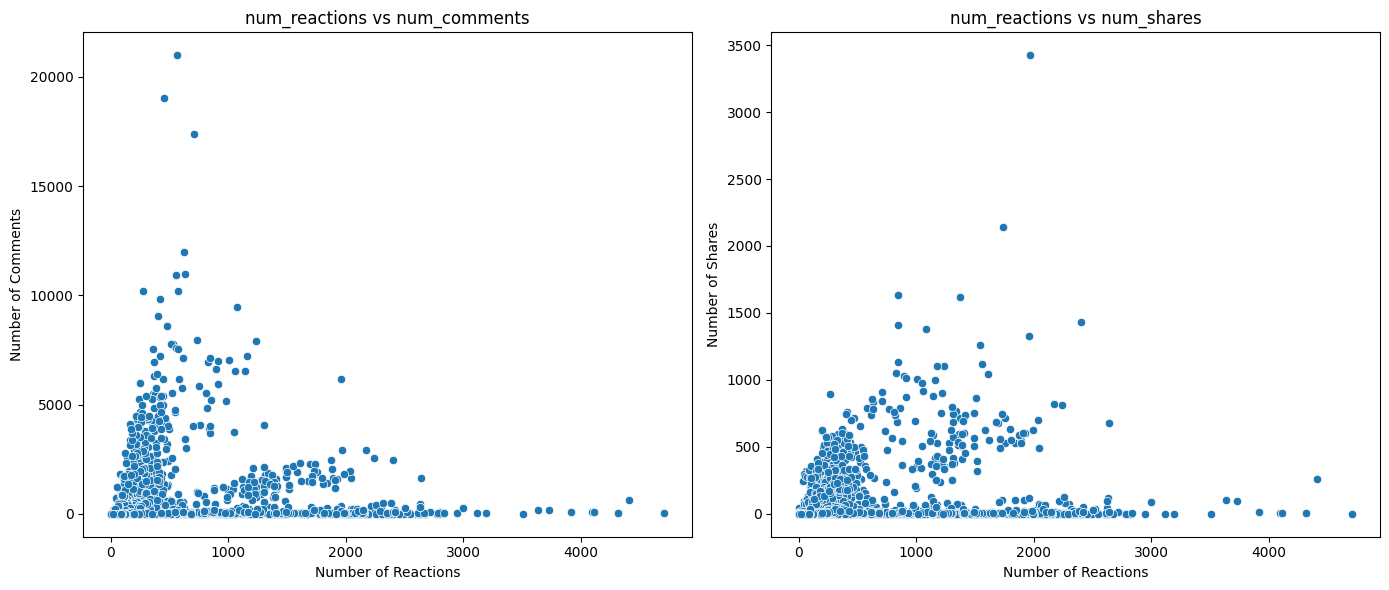

In [67]:
#Plotting the scatter plots
plt.figure(figsize=(14, 6))

# Scatter plot for num_reactions vs num_comments
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['num_reactions'], y=df['num_comments'])
plt.title('num_reactions vs num_comments')
plt.xlabel('Number of Reactions')
plt.ylabel('Number of Comments')

# Scatter plot for num_reactions vs num_shares
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['num_reactions'], y=df['num_shares'])
plt.title('num_reactions vs num_shares')
plt.xlabel('Number of Reactions')
plt.ylabel('Number of Shares')

plt.tight_layout()
plt.show()

**NUMBER OF REACTIONS ANALYSIS**

<Axes: >

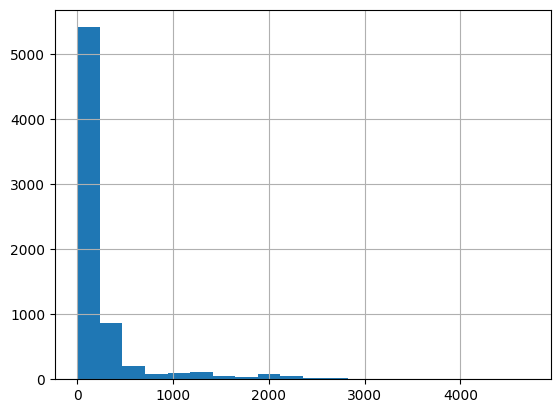

In [68]:
df['num_reactions'].hist(bins=20)

**NUMBER OF COMMENTS ANALYSIS**

<Axes: >

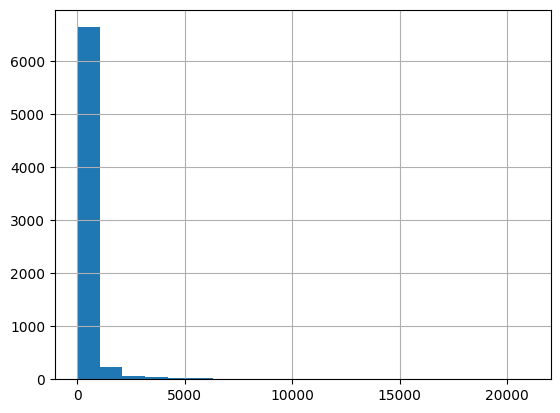

In [69]:
df['num_comments'].hist(bins=20)

**NUMBER OF SHARES**

<Axes: >

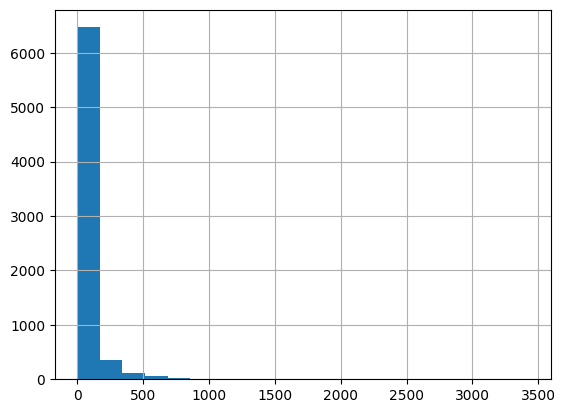

In [70]:
df['num_shares'].hist(bins=20)

**Time Series Analysis for Number of Reactions**

<Axes: xlabel='status_published'>

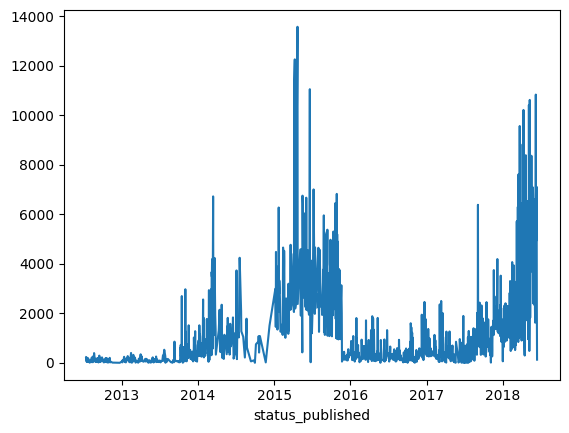

In [71]:
df.groupby(df['status_published'].dt.date)['num_reactions'].sum().plot(kind='line')

**INTERPRETATION - Status is more published during the years 2015 to 2016.**

**Heatmap for Correlation**

<Axes: >

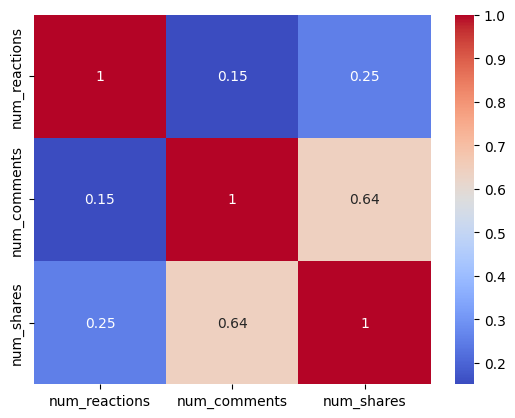

In [72]:
corr_matrix = df[['num_reactions', 'num_comments', 'num_shares']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

**INTERPRETATION - num_comments and num_reactions seems to be mostly correlated.**

# **MODEL TRAINING AND EVALUATION**

**KMEANS CLUSTERING ALGORITHM**

In [75]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [80]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['num_reactions', 'num_comments', 'num_shares']])
df['cluster'] = kmeans.labels_

In [76]:
# Select relevant columns
selected_columns = [ 'num_reactions', 'num_comments', 'num_shares',
                    'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
df_selected = df[selected_columns]

In [77]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_selected)


In [78]:
# Initialize list to store SSE (Sum of Squared Errors) for each K
sse = []

# Fit KMeans clustering for different values of K
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

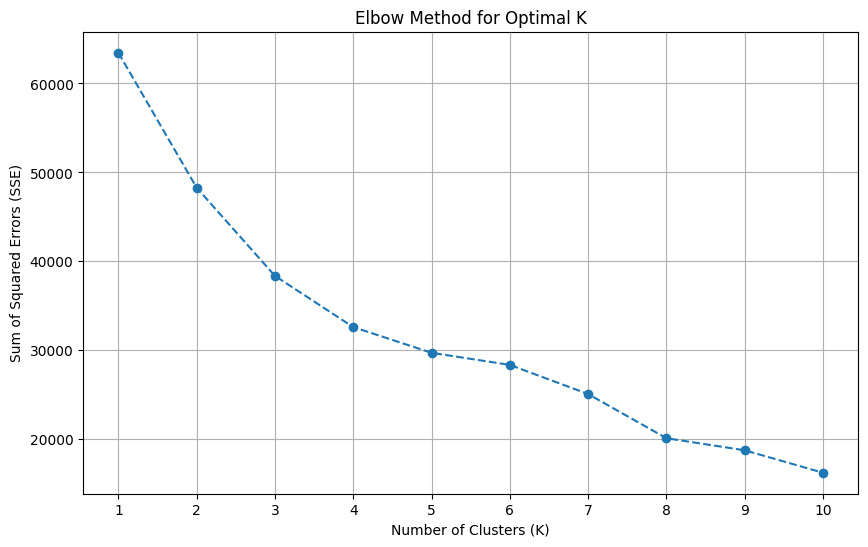

In [79]:
# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal K')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

**INTERPRETATION - Elbow point appears to be at K = 4, after this point SSE starts to decrease slowly**

**LINEAR REGRESSION MODEL**

In [96]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['status_type_encoded'] = label_encoder.fit_transform(df['status_type'])
print(df[['status_type', 'status_type_encoded']].head())

  status_type  status_type_encoded
0       video                    3
1       photo                    1
2       video                    3
3       photo                    1
4       photo                    1


In [97]:
from sklearn.model_selection import train_test_split
X = df[['num_comments', 'num_shares','num_reactions',
        'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys']]
y = df['status_type_encoded']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)


In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lrm = LinearRegression()
lrm.fit(X_train, y_train)
y_pred = lrm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.7113966543614093


**INTERPRETATION - NOT Advisable since MSE is 0.711 which is not optimal.**

**COUNT OF DIFFERENT TYPE OF POSTS**

In [91]:
# Count the different types of posts
post_counts = df['status_type'].value_counts()

# Print the count of different types of posts
print("Count of different types of posts:")
print(post_counts)


Count of different types of posts:
status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


**AVERAGE ENGAGEMENT RATE (FOR num_reactions', 'num_comments', 'num_shares')**

In [53]:
# Calculate the average values for 'num_reactions', 'num_comments', and 'num_shares'
average_values = df[['num_reactions', 'num_comments', 'num_shares']].mean()

# Print the average values for the specified columns
print("Average values of num_reactions, num_comments, num_shares:")
print(average_values)


Average values of num_reactions, num_comments, num_shares:
num_reactions    230.117163
num_comments     224.356028
num_shares        40.022553
dtype: float64
